# Fine Tuning For BERT Models with TPU

Bidirectional Encoder Representations from Transformers (BERT) is a transformer-based machine learning technique for natural language processing (NLP) pre-training developed by Google.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.63.109.74:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.63.109.74:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [3]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.3 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 596 kB 56.1 MB/s 
     |████████████████████████████████| 6.6 MB 22.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Import Library

In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hepsiburada.csv', encoding="utf-8")

In [7]:
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [8]:
df.Rating.value_counts()

1    229821
0     13676
Name: Rating, dtype: int64

In [9]:
df.Rating = df.Rating.map({1:0, 0:1})

In [10]:
df.Rating.value_counts()

0    229821
1     13676
Name: Rating, dtype: int64

In [12]:
X = df['Review'].values
y = df['Rating'].values

# Hizli calismasi icin Array lere cevirdik
# MachineLearning modellerinde de Array lere cevirip verirsek islemlerimiz hizlanir.

## Tokenization

### Fixing token counts of all documents

In [13]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")

# transilation, ner gibi calismalrda büyük kücük harf duyarli oldugu icin cased olarak kullanmaliyiz.
# cased büyük kücük harf dikkate alinarak tokinize yapiliyor.
# uncase kücük harf olarak tokinize yapiyor.
# Türkce karakterlerde problem ciktigi icin biz yine manuel yapiyoruz.


max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent.lower(), add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/245k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (758 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  758


In [14]:
text = "Şentepeli Şükrü abi?😊".lower()
 
tokenizer.tokenize(text)

['şen', '##tepe', '##li', 'şük', '##rü', 'abi', '?', '😊']

In [15]:
sentence = "Şentepeli Şükrü abi?😊".lower()
tokens = tokenizer.encode(sentence, add_special_tokens=True)
print(tokens)
print(len(tokens))

# cls 2 ve sep 3 olarak numaralar yerlesti. Digerleri ise corpus daki siklik sayilarina göre verilen indexler.
# [2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 992, 3]
  # 2 [CLS] ve 3 [SEP]
  # ['şen', '##tepe', '##li', 'şük', '##rü', 'abi', '?', '😊'] tokenlerine karsilik gelen 
  # encoding numara degerleri:[14192, 5364, 2031, 9204, 9025, 13780, 35, 992]


[2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 992, 3]
10


In [16]:
sentence = "Şentepeli Şükrü abi?".lower()
tokens = tokenizer.encode_plus(sentence, add_special_tokens=True)
print(tokens)

{'input_ids': [2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [17]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) < 10)
print(sum(np.array(list) < 10))

[ True False  True  True False False]
3


In [18]:
np.array(max_token).mean()

36.4837390193719

In [19]:
sum(np.array(max_token) < 160) / len(max_token)

0.9877000537994308

In [25]:
def transformation(X):
  # set array dimensions
  seq_len = 160
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase.lower(), max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

# endcode_plus tokenlerimizi Bert modelin istedigi formata, yani 3 tane matrise ceviriyor.  

In [21]:
Xids, Xmask = transformation(X)

In [22]:
Xids.shape

(243497, 160)

In [23]:
Xmask.shape

(243497, 160)

In [82]:
sentence = "Şentepeli Şükrü abi?"
tokens = tokenizer.encode_plus(sentence, max_length=20, truncation=True,
                                      padding='max_length', add_special_tokens=True)
print(tokens)

{'input_ids': [2, 7286, 5364, 2031, 16972, 13780, 35, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [26]:
X[0]

'3 yıldır tık demedi. :)'

In [27]:
Xids[0]

array([2.0000e+00, 2.3000e+01, 5.1420e+03, 4.1730e+03, 1.4643e+04,
       2.0160e+03, 1.8000e+01, 3.0000e+01, 1.3000e+01, 3.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [28]:
np.zeros((5, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
Xids

array([[2.0000e+00, 2.3000e+01, 5.1420e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.3000e+01, 5.1420e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.7820e+03, 3.1200e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+00, 3.8070e+03, 9.2500e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 3.1560e+03, 4.1650e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.6807e+04, 1.9870e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [30]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [31]:
from tensorflow.keras.utils import to_categorical

l = np.array([1, 0, 2, 3, 4])
to_categorical(l, 5) 

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [32]:
np.array([1, 0, 1, 0, 0]).reshape(-1,1) #reshape(5,1)

array([[1],
       [0],
       [1],
       [0],
       [0]])

In [33]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
labels = y.reshape(-1,1)
labels

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [36]:
import tensorflow as tf

# Herbir yorumumuzu, satirlar halinde tensorlere cevirdik, modelimiz sadece bu sekilde tensor kabul ediyor
# Batch size lara ayirmak icin satir satir tensörlere cevrildi

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))
dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(160,), dtype=tf.float64, name=None), TensorSpec(shape=(160,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [37]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

# Model input_ids ve attention_mask i tanimasi icin map function ile bu isimlere atadik
# Tokenize icerisinde gecen haliyle 'input_ids' ve 'attention_mask' olarak dictionary icerisinde olmasi lazim.
# Bu sekilde map dönüsüm uyguluyorum.
# Dolayisiyla Tensorlere cevirdigimiz yorumlarimizi map ile tekrar 
# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

In [38]:
dataset

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(160,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(160,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

## Train Test Split

In [39]:
batch_size = 32 #16

# batch_size ilk asamada belirliyoruz
# tavsiye 32 ya da 16 olarak belirleniyor
# datayi shuffle ile kariyoruz
# en iyi karma olmasi icin, buffer_size a satir sayisindan fazla bir sayi verilmeli.
# reshuffle_each_iteration=False alarak test datamizi train datamiza karismasinin önüne geciyoruz ve saglikli degerlendirme icin önemli
# True olursa diger epoch ta test datasi train datasina dahil oldugundan overfittinge sebep olur.

# shuffle and batch
# fit into a batch of 32
dataset = dataset.shuffle(243500, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

# 32 li paketler halinde modele verilecegini bildirmek icin drop_remainder=True yaziyoruz, aksi halde None oldugundan hata verir.

In [41]:
dataset

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None)}, TensorSpec(shape=(32, 1), dtype=tf.int64, name=None))>

In [42]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

# Datamizi train ve test olarak ayirdik

In [43]:
print(len(dataset))
print(len(dataset)*0.9)
print(int(len(dataset)*0.9))

7609
6848.1
6848


In [44]:
Xids.shape

(243497, 160)

In [45]:
#batch_size=32
int(Xids.shape[0]/batch_size)

7609

## Creating Model

In [69]:
from transformers import TFAutoModel
model = TFAutoModel.from_pretrained("dbmdz/bert-base-turkish-cased")
input_ids = tf.keras.layers.Input(shape=(160,), name='input_ids', dtype='int32')
attention_mask = tf.keras.layers.Input(shape=(160,), name='attention_mask', dtype='int32')
model.bert(input_ids=input_ids, attention_mask=attention_mask)

Some layers from the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at dbmdz/bert-base-turkish-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


TFBaseModelOutputWithPoolingAndCrossAttentions([('last_hidden_state',
                                                 <KerasTensor: shape=(None, 160, 768) dtype=float32 (created by layer 'bert')>),
                                                ('pooler_output',
                                                 <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'bert')>)])

In [71]:
print(model.bert(input_ids=input_ids, attention_mask=attention_mask)['last_hidden_state'])

KerasTensor(type_spec=TensorSpec(shape=(None, 160, 768), dtype=tf.float32, name=None), name='bert/encoder/layer_._11/output/LayerNorm/batchnorm/add_1:0', description="created by layer 'bert'")


In [47]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("dbmdz/bert-base-turkish-cased")
    input_ids = tf.keras.layers.Input(shape=(160,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(160,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
# bert modelde shape maximum 512 olarak verilebiliyor
# pooler_output bert modellerinin en son kismidir
# word embedding bert ile egitilmis oldugu icin bir tokenin iliskisi olabilecek tüm tokenleri bilen bir 768 boyutlu bir embedding eklenmis oluyor.
# burada bert in word embeddinglerini kullaniyorum, önemli olan bu.

    x = tf.keras.layers.Dense(160, activation='relu')(embeddings) # bu yapi api yapisi olarak gecer normalde suana kadar squential ögrendik
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) # 0.1 tavsiye edilen deger
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

# burada aktarma islemi add ile degil de önceki asamayi parantez icerisinde yazarak aktariyoruz.
# attention_mask ler de 768 boyutlu word embeddinge cevriliyor.
# 

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

# Modeli def icerisinde yazmamiz gerekiyor.
# TensorFlow library kullandigimizdan dolayi modelimizi TFAutomodel olarak import ediyoruz.    
# Input layerlarimizdan birine input_ids digerine attention_mask olarak tanimliyoruz.
# modelimize dtype= int32 olarak datayi vermemiz gerekiyor.
#  

In [48]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5) # tavsiye edilen learning_rate ler 2e-5 3e-5 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Downloading:   0%|          | 0.00/520M [00:00<?, ?B/s]

Some layers from the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at dbmdz/bert-base-turkish-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#pd.Series(y).value_counts(normalize=True)

0    0.943835
1    0.056165
dtype: float64

In [ ]:
# Burada sample_weight uygulayamiyoruz
# Ama class_weight kullanabiliriz

In [ ]:
#weights = {0:0.05, 1:0.95}

In [49]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 160)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 160)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  110617344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 160,                                           

In [50]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1) 

# epoch=2 or 3 olarak tavsiye ediliyor, fazla yapilirsa overfittinge gider
    

6848/6848 [==============================] - 664s 85ms/step - loss: 0.0778 - recall: 0.6696 - val_loss: 0.0617 - val_recall: 0.7842


## Model evaluation

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = []
for i in val_ds:
  for j in np.array(i[1]):
    y_test.append(j)

print(classification_report(y_test, y_pred))

# Array daha hizli calistigi icin Array a cevirdik
# Tensör ü Array a dönüstürüp validation datasindan y label ini aliyoruz.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23008
           1       0.83      0.78      0.80      1344

    accuracy                           0.98     24352
   macro avg       0.91      0.89      0.90     24352
weighted avg       0.98      0.98      0.98     24352



In [52]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = []
for i in train_ds:
  for j in np.array(i[1]):
    y_train.append(j)

print(classification_report(y_train, y_train_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    206804
           1       0.88      0.85      0.87     12332

    accuracy                           0.99    219136
   macro avg       0.94      0.92      0.93    219136
weighted avg       0.99      0.99      0.99    219136



In [53]:
val_ds

<SkipDataset element_spec=({'input_ids': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None)}, TensorSpec(shape=(32, 1), dtype=tf.int64, name=None))>

In [54]:
for i in val_ds:
  print(np.array(i[1]))
  break

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


In [ ]:
 #Ağırlıklandırılmış Model ---> dropout(0,1), batchsize = 16, epoch =1, learning rate = 2e-5
 
 TEST SET
                precision    recall  f1-score   support

           0       0.99      0.97      0.98     22987
           1       0.63      0.89      0.74      1365

    accuracy                           0.96     24352
   macro avg       0.81      0.93      0.86     24352
weighted avg       0.97      0.96      0.97     24352

TRAIN SET
                precision    recall  f1-score   support

           0       1.00      0.97      0.99    206825
           1       0.69      0.95      0.80     12311

    accuracy                           0.97    219136
   macro avg       0.84      0.96      0.89    219136
weighted avg       0.98      0.97      0.98    219136



history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1,class_weight=weights)

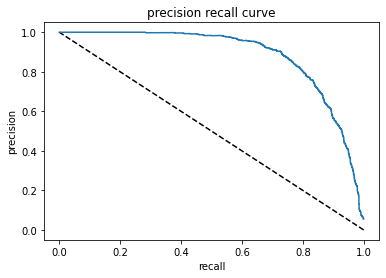

In [55]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [56]:
average_precision_score(y_test, y_pred_proba)

0.883154925010698

In [57]:
model3.save("sentiment_model_without_weighted.h5")

In [58]:
import tensorflow as tf
#import official.nlp.optimization as adamw
from tensorflow.keras.models import load_model


model4 = load_model('/content/sentiment_model_without_weighted.h5')

In [59]:
# initialize tokenizer from transformers
from transformers import AutoTokenizer, TFAutoModel

tokenizers = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")

def prep_data(text):
    # tokenize to get input IDs and attention mask tensors
    tokens = tokenizers.encode_plus(text.lower(), max_length=160,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True,
                                   return_tensors='tf')
  
    return {'input_ids': tokens['input_ids'],      #tf.cast(tokens['input_ids'], tf.int32)
            'attention_mask': tokens['attention_mask']} #tf.cast(tokens['attention_mask'], tf.int32)
            
# return_tensors='tf' yazarak prediction icin verecegimiz text leri tensöre ceviriyor            

The main difference is stemming from the additional information that encode_plus is providing. If you read the documentation on the respective functions, then there is a slight difference forencode():

Converts a string in a sequence of ids (integer), using the tokenizer and vocabulary. Same as doing self.convert_tokens_to_ids(self.tokenize(text)).

and the description of encode_plus():

Returns a dictionary containing the encoded sequence or sequence pair and additional information: the mask for sequence classification and the overflowing elements if a max_length is specified.

Depending on your specified model and input sentence, the difference lies in the additionally encoded information, specifically the input mask. Since you are feeding in two sentences at a time, BERT (and likely other model variants), expect some form of masking, which allows the model to discern between the two sequences, see here. Since encode_plus is providing this information, but encode isn't, you get different output results.

https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizer.create_token_type_ids_from_sequences

In [60]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. "
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
review15 = "alınca anlarsın anyayı konyayı"
review16 = "çöpe atacak paran varsa alabilirsin"
review17= "Telefon fena değil"
review18 = "al da gününü gör"
review19 = "Ürün süper ama satıcı ve kargo berbat"
review20= "kargo süper ama ürün berbat"
review21 = "Aldigim TV cok kaliteli diye dusunmustum, sonradan cok da iyi bir TV olmadigini dusundum, ama neyse yine de memnunum."
review22 = "😊"
review23 = ":)"
review24= "I ❤️ you"
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14, review15, review16, review17, review18, review19, review20, review21, review22, review23, review24]

In [61]:
probs = []
for i in reviews:

  in_tensor = prep_data(i)

  prob = model4.predict(in_tensor)[0][0]

  probs.append(prob)

# tanimlanan def ile text leri tensörlere cevirdik  

In [63]:
in_tensor

{'attention_mask': <tf.Tensor: shape=(1, 160), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0]], dtype=int32)>,
 'input_ids': <tf.Tensor: shape=(1, 160), dtype=int32, numpy=
 array([[    2,    77,   610,  1354, 13799,     3,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0

In [62]:
model4.predict(in_tensor)

array([[0.04739168]], dtype=float32)

In [64]:
probs

[0.00051757693,
 0.00049877167,
 0.98805517,
 0.008706719,
 0.3299187,
 0.9785163,
 0.0011189282,
 0.99287677,
 0.0004967451,
 0.9761807,
 0.0005121231,
 0.2837559,
 0.9212624,
 0.014458746,
 0.050358146,
 0.32332814,
 0.42445558,
 0.027199715,
 0.12589908,
 0.7540023,
 0.029877901,
 0.35565487,
 0.008768827,
 0.047391683]

In [65]:
classes  = (np.array(probs) >= 0.5).astype("int")
classes

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [66]:
my_dict = {"Review":reviews, "prob":probs, "classes":classes}

In [67]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(my_dict)

,Review,prob,classes
0,çok beğendim herkese tavsiye ederim,0.000518,0
1,süper ürün aynı gün elime geçti,0.000499,0
2,büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım,0.988055,1
3,kelimelerle tarif edilemez,0.008707,0
4,tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten,0.329919,0
5,hiç resimde gösterildiği gibi değil,0.978516,1
6,kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler,0.001119,0
7,hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum,0.992877,1
8,tam bir fiyat performans ürünü,0.000497,0
9,beklediğim gibi çıkmadı,0.976181,1
